In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
qry = session.query(Measurement).first()
qry.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2453e8f7610>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
max_date = session.query(func.max(Measurement.date)).first()
max_date = list(np.ravel(max_date))[0]
max_date = dt.datetime.strptime(max_date, '%Y-%m-%d')
max_day = int(dt.datetime.strftime(max_date, '%d'))
max_month = int(dt.datetime.strftime(max_date, '%m'))
max_year = int(dt.datetime.strftime(max_date, '%Y'))
year_early = dt.date(max_year, max_month, max_day) - dt.timedelta(days=365)
year_early

datetime.date(2016, 8, 23)

In [14]:
# Perform a query to retrieve the data and precipitation scores
current_annual_prcp = session.query(Measurement.date, Measurement.prcp).filter(func.date(Measurement.date) >= year_early).all()


In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_rough = pd.DataFrame(current_annual_prcp)



In [16]:
# Sort the dataframe by date
prcp_df = prcp_rough.groupby(prcp_rough.date).mean()



Text(0, 0.5, 'Precipitation (inches)')

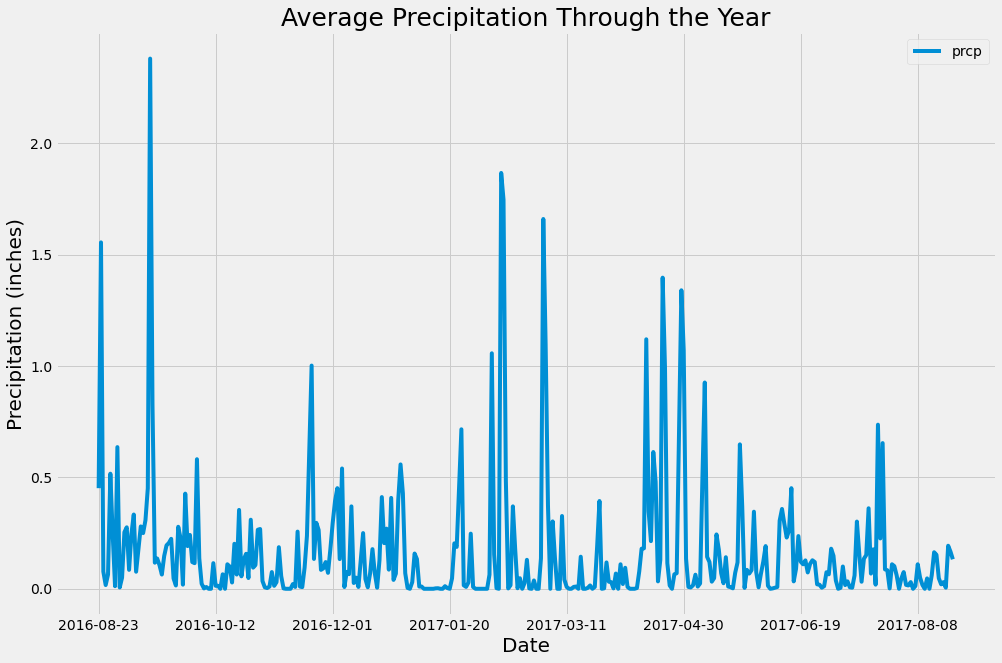

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize=(15,10))
plt.title('Average Precipitation Through the Year', size=25)
plt.xlabel('Date', size=20)
plt.ylabel('Precipitation (inches)', size=20)


In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
stations_count = session.query(func.distinct(Measurement.station)).count()
stations_count

9

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations_activity


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).first()
temp_data


(53.0, 87.0, 73.09795396419437)

Text(0.5, 1.0, 'Temperature for the Year')

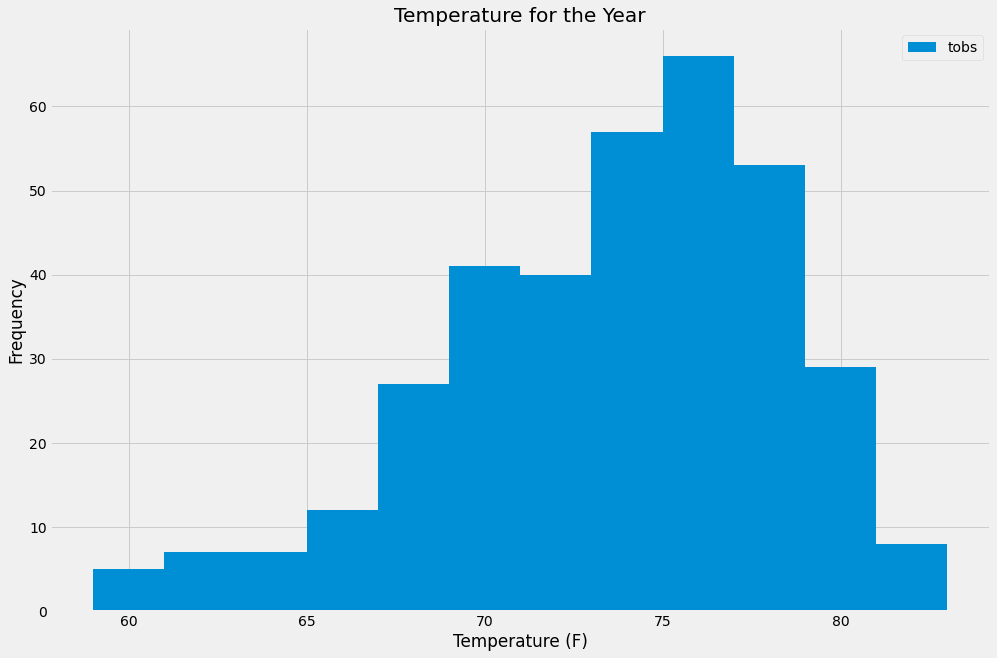

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_year_q = session.query(Measurement.tobs, Measurement.date).filter(Measurement.station == 'USC00519281').filter(func.date(Measurement.date) >= '2016-08-23').all()
temp_year_p = pd.DataFrame(temp_year_q)
temp_year = temp_year_p.groupby(temp_year_p.date).mean()
temp_year.plot.hist(bins=12, figsize=(15,10))
plt.xlabel('Temperature (F)')
plt.title('Temperature for the Year')

# Close session

In [ ]:
# Close Session
session.close()